## 1. Data Preprocessing

## Overview

Practice for Data Analytic Class in Merdeka Belajar

## Objecive

• Retrieving data

• Cleansing, integrating
dan transforming data

• Data Preparation

• Exploratory Data
Analysis

• Data Visualization


**About Dataset**

This is a snapshot of a dataset created by Tony Pin on Melbourne real estate data. It was scraped from publicly available results posted every week from Domain.com.au. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

This is intended as a static (unchanging) snapshot of https://www.kaggle.com/anthonypino/melbourne-housing-market. It was created in September 2017. Additionally, homes with no Price have been removed.

Dataset description & download https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot

**1.1 Importing Library**

In [ ]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

**1.2 Importing Dataset**

Change this dataset! with minimum features 20

In [ ]:
# @title
import pandas as pd
dataset = pd.read_csv('melb_data.csv')
dataset

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


## 2. Exploratory Data

In [ ]:
# @title
dataset.shape

(13580, 21)

In [ ]:
# @title
dataset.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
# @title
dataset.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [ ]:
# @title
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [ ]:
# @title
dataset.nunique()

Suburb             314
Address          13378
Rooms                9
Type                 3
Price             2204
Method               5
SellerG            268
Date                58
Distance           202
Postcode           198
Bedroom2            12
Bathroom             9
Car                 11
Landsize          1448
BuildingArea       602
YearBuilt          144
CouncilArea         33
Lattitude         6503
Longtitude        7063
Regionname           8
Propertycount      311
dtype: int64

**2.1 Handling Missing Value**

Let's assume unknown value as missing value since unknown means not known or no values

In [ ]:
# @title
dataset.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

Perform imputer to handle missing value in numerical data

In [ ]:
# @title
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer

SimpleImputer()

In [ ]:
# @title
imputer = imputer.fit(dataset[['Car', 'BuildingArea', 'YearBuilt']])
imputer

SimpleImputer()

In [ ]:
# @title
dataset[['Car', 'BuildingArea', 'YearBuilt']] = imputer.transform(dataset[['Car', 'BuildingArea', 'YearBuilt']])
dataset.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

Using drop column tohandle missing value on categorical or object data

In [ ]:
# @title
dataset = dataset.dropna(axis=1)
dataset.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

drop datetime column since we don't need it, we will use it in the next lecure for forecasting time series data

In [ ]:
# @title
dataset = dataset.drop('Date', axis=1)
dataset

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1964.684217,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,16.7,3150.0,4.0,2.0,2.0,652.0,151.96765,1981.000000,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,6.8,3016.0,3.0,2.0,2.0,333.0,133.00000,1995.000000,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,6.8,3016.0,3.0,2.0,4.0,436.0,151.96765,1997.000000,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,6.8,3016.0,4.0,1.0,5.0,866.0,157.00000,1920.000000,-37.85908,144.89299,Western Metropolitan,6380.0


## 3. Data Visualization

**Eploratory Data Analysis (EDA)**

we will not use exploratory data analysis like in the previous class, we'll take another apporach to visualize data

**3.1 Check Outliers**

Outliers are values at the extreme ends of a dataset.

Some outliers represent true values from natural variation in the population. Other outliers may result from incorrect data entry, equipment malfunctions, or other measurement errors.

An outlier isn’t always a form of dirty or incorrect data, so you have to be careful with them in data cleansing. What you should do with an outlier depends on its most likely cause.

for more info: https://www.scribbr.com/statistics/outliers/

In [ ]:
# @title
dataset.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.960433,3990.669241,392.002962,28.972246,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,122.000000,1960.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,151.967650,1964.684217,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,151.967650,1975.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


<Axes: >

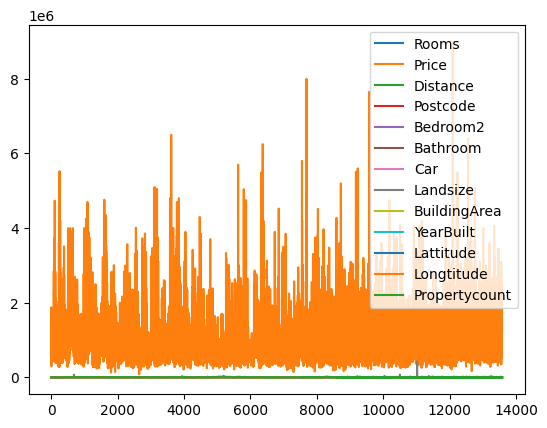

In [ ]:
# @title
import matplotlib.pyplot as plt
%matplotlib inline
dataset.plot()

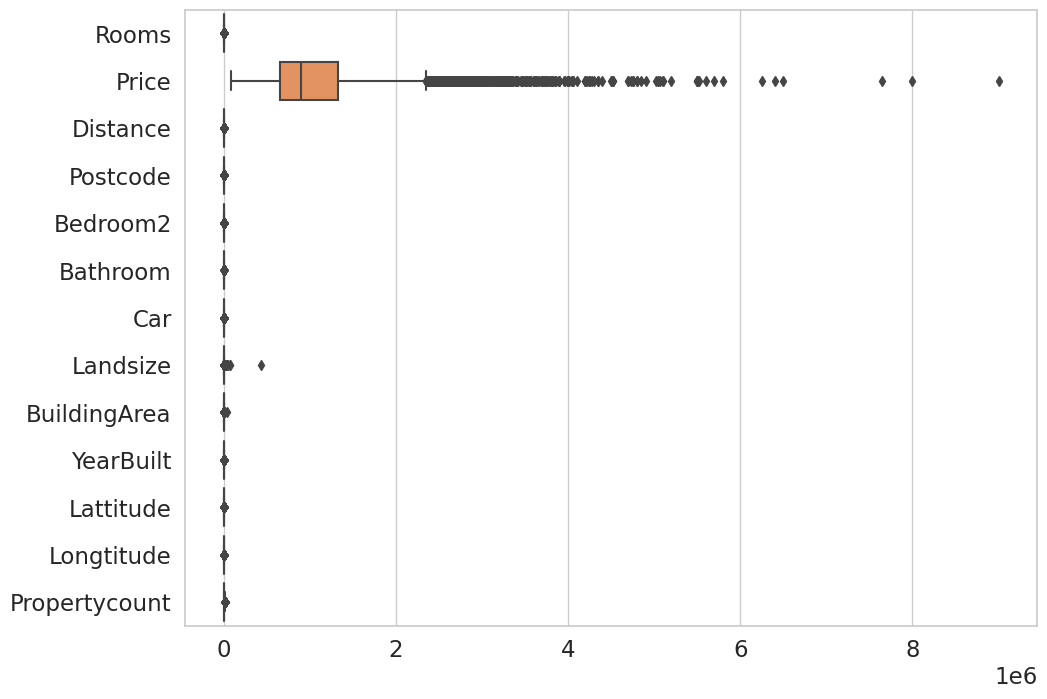

In [ ]:
# @title
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

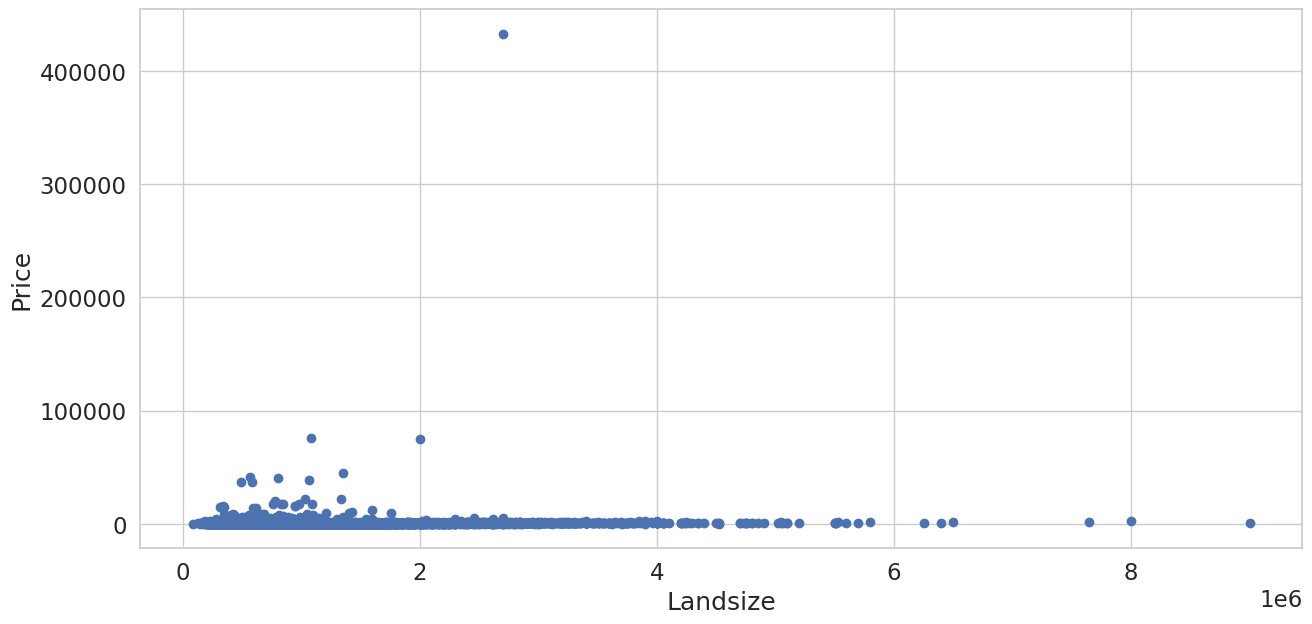

In [ ]:
# @title
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['Price'], dataset['Landsize'])

# x-axis label
ax.set_xlabel('Landsize')

# y-axis label
ax.set_ylabel('Price')
plt.show()

**Removing the outliers using IQR**

**IQR (Inter Quartile Range)**

IQR = Quartile3 – Quartile1

Quartile description: https://rumusbilangan.com/rumus-kuartil/


IQR is interpolation method to remove outliers

To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

upper = Q3 +1.5*IQR

lower = Q1 – 1.5*IQR

how to calculate IQR:

https://www.timesmojo.com/what-is-the-15-iqr-rule/

https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

In the above formula as according to statistics, the 0.5 scale-up of IQR (new_IQR = IQR + 0.5*IQR) is taken, to consider all the data between 2.7 standard deviations in the Gaussian Distribution.

In [ ]:
# @title
import sklearn

# IQR Price
Q1 = np.percentile(dataset['Price'], 25,
                   method = 'midpoint')

Q3 = np.percentile(dataset['Price'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", dataset.shape)

Old Shape:  (13580, 19)


In [ ]:
# @title
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['Price'] > upper].index
outliers_lower = dataset[dataset['Price'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (12968, 19)


In [ ]:
# @title
import sklearn

# IQR Landsize
Q1 = np.percentile(dataset['Landsize'], 25,
                   method = 'midpoint')

Q3 = np.percentile(dataset['Landsize'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", dataset.shape)

Old Shape:  (12968, 19)


In [ ]:
# @title
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['Landsize'] > upper].index
outliers_lower = dataset[dataset['Landsize'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (12627, 19)


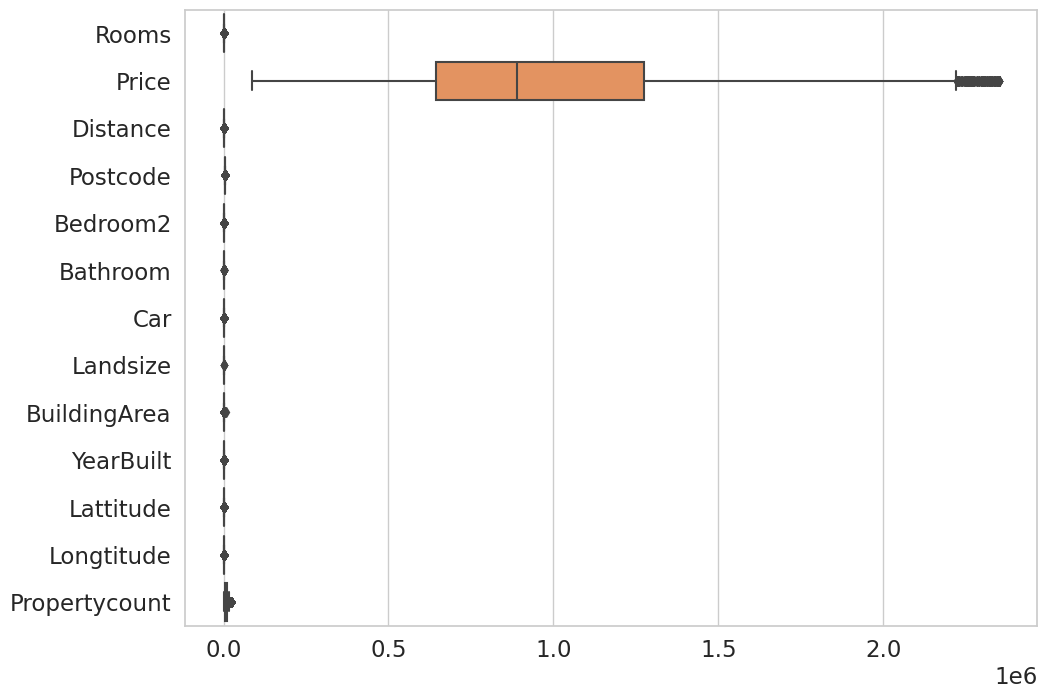

In [ ]:
# @title
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

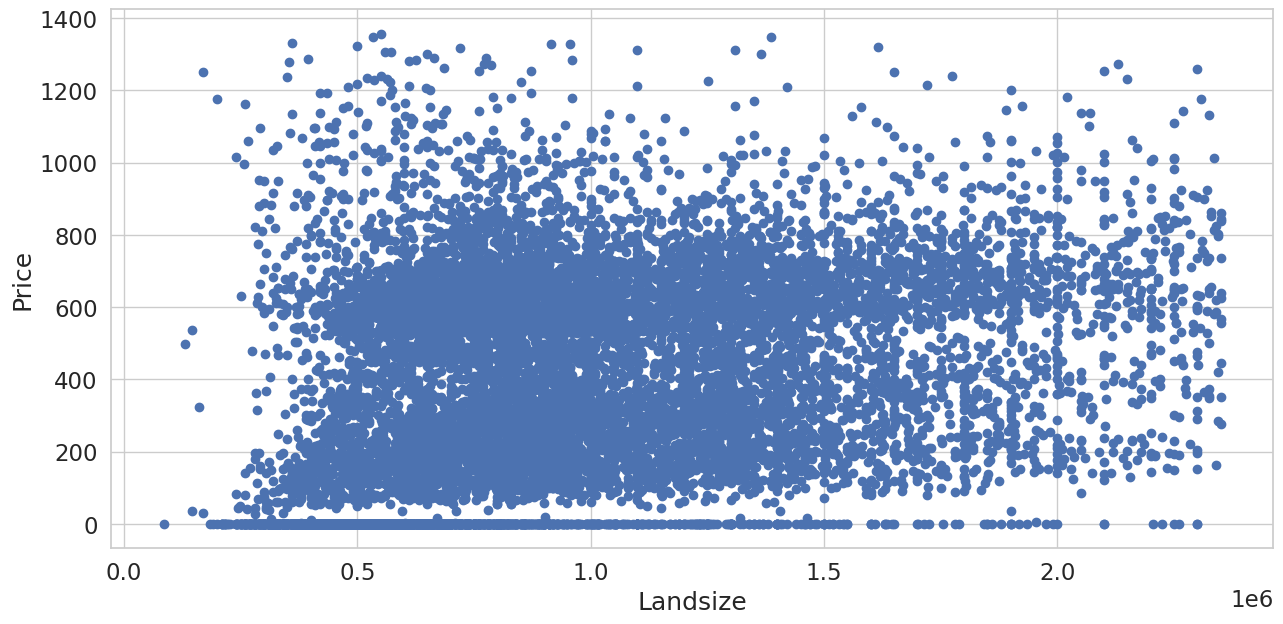

In [ ]:
# @title
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['Price'], dataset['Landsize'])

# x-axis label
ax.set_xlabel('Landsize')

# y-axis label
ax.set_ylabel('Price')
plt.show()

**3.2 CORRELATION MATRIX**

correlation matrix with heatmap

<ipython-input-24-4b443a21f68f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_data.corr()


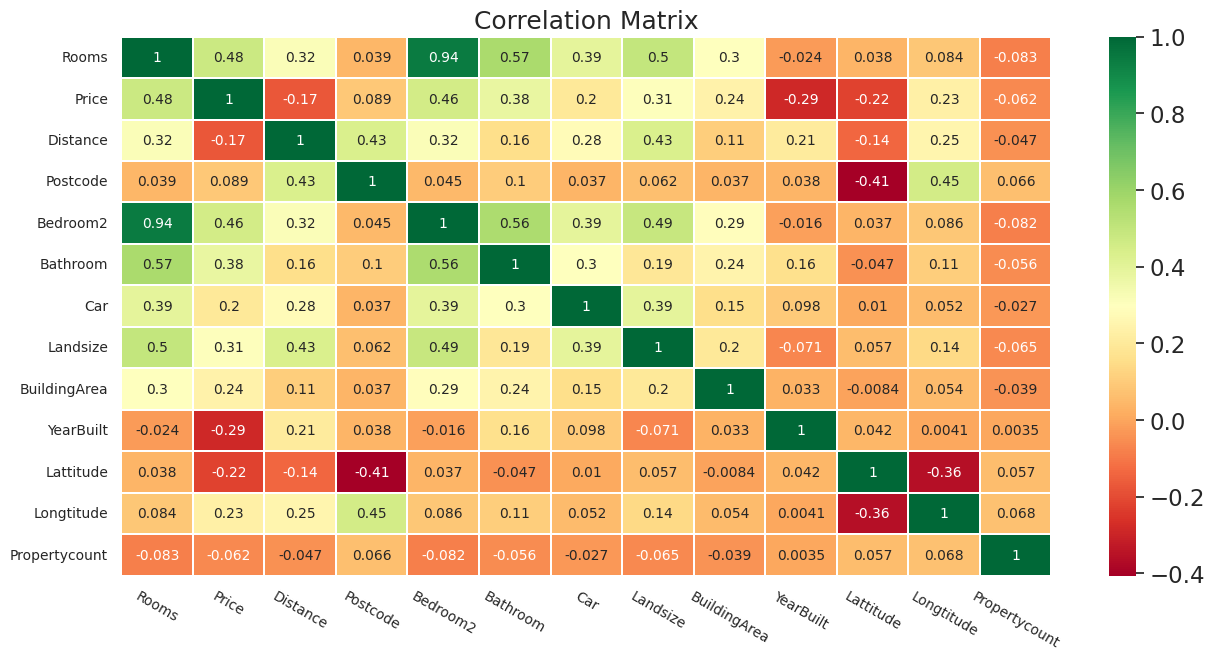

In [ ]:
# @title
corr_data = dataset
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
## ADD FEATURE SELECTION HERE

**4. Splitting Dataset**

**4.1 Slicing**

We define x and y as x for data and y for label

In [ ]:
# @title
x = dataset.drop('Type', axis=1)
x

,Suburb,Address,Rooms,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,850000.0,PI,Biggin,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1964.684217,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,1600000.0,VB,Nelson,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13574,Westmeadows,9 Black St,3,582000.0,S,Red,16.5,3049.0,3.0,2.0,2.0,256.0,151.96765,1964.684217,-37.67917,144.89390,Northern Metropolitan,2474.0
13575,Wheelers Hill,12 Strada Cr,4,1245000.0,S,Barry,16.7,3150.0,4.0,2.0,2.0,652.0,151.96765,1981.000000,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,1031000.0,SP,Williams,6.8,3016.0,3.0,2.0,2.0,333.0,133.00000,1995.000000,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,1170000.0,S,Raine,6.8,3016.0,3.0,2.0,4.0,436.0,151.96765,1997.000000,-37.85274,144.88738,Western Metropolitan,6380.0


Choose feature Type as a label

In [ ]:
# @title
y = dataset["Type"]
y

0        h
1        h
2        h
3        h
4        h
        ..
13574    h
13575    h
13576    h
13577    h
13579    h
Name: Type, Length: 12627, dtype: object

In [ ]:
y.values.reshape(-1,1)

array([['h'],
       ['h'],
       ['h'],
       ...,
       ['h'],
       ['h'],
       ['h']], dtype=object)

**4.2 Categorical Encoding**

Choose One Hot Encoding or Label Encoding for perform categorical encoding

**One-Hot Encoding for data input x**

In [ ]:
x = pd.get_dummies(x)
x

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,SellerG_iSell,SellerG_iTRAK,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,...,0,0,0,0,1,0,0,0,0,0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,...,0,0,0,0,1,0,0,0,0,0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,...,0,0,0,0,1,0,0,0,0,0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1964.684217,...,0,0,0,0,1,0,0,0,0,0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13574,3,582000.0,16.5,3049.0,3.0,2.0,2.0,256.0,151.96765,1964.684217,...,0,0,0,0,1,0,0,0,0,0
13575,4,1245000.0,16.7,3150.0,4.0,2.0,2.0,652.0,151.96765,1981.000000,...,0,0,0,0,0,0,1,0,0,0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.00000,1995.000000,...,0,0,0,0,0,0,0,0,1,0
13577,3,1170000.0,6.8,3016.0,3.0,2.0,4.0,436.0,151.96765,1997.000000,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
x.shape

(12627, 13041)

**Label Encoding for label y**

In [ ]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0])

**4.2.2 Normalization**

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

reference : https://stackoverflow.com/questions/62178888/can-someone-explain-to-me-how-minmaxscaler-works


In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)
x = pd.DataFrame(x)

x

,0,1,2,3,4,5,6,7,8,9,...,13031,13032,13033,13034,13035,13036,13037,13038,13039,13040
0,0.111111,0.615894,0.052854,0.068577,0.10,0.125,0.1,0.148858,0.022378,0.935139,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.111111,0.419426,0.052854,0.068577,0.10,0.125,0.0,0.114959,0.011633,0.856448,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.222222,0.609272,0.052854,0.068577,0.15,0.250,0.0,0.098747,0.022088,0.856448,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.222222,0.337748,0.052854,0.068577,0.15,0.250,0.1,0.069270,0.022378,0.935139,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.668874,0.052854,0.068577,0.15,0.125,0.2,0.088430,0.020910,0.995134,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12622,0.222222,0.219426,0.348837,0.050154,0.15,0.250,0.2,0.188651,0.022378,0.935139,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12623,0.333333,0.512141,0.353066,0.153531,0.20,0.250,0.2,0.480472,0.022378,0.954988,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12624,0.222222,0.417660,0.143763,0.016377,0.15,0.250,0.2,0.245394,0.019585,0.972019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12625,0.222222,0.479029,0.143763,0.016377,0.15,0.250,0.4,0.321297,0.022378,0.974453,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
y.reshape(-1, 1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
##THERE IS SOMETHING MISSING HERE!

**4.3 Splitting**

In [ ]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.8, random_state=1, stratify=y)

In [ ]:
from collections import Counter
print("Train distribution", Counter(yTrain))
print("Test distribution", Counter(yTest))

Train distribution Counter({0: 7021, 2: 2214, 1: 866})
Test distribution Counter({0: 1756, 2: 553, 1: 217})


This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

For more: https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn

## 5. ML Model : Classification

In ML, by Classification, we mean a supervised learning approach referring to classifying or categorizing some unknown items into a discrete set of classes.

More: https://medium.datadriveninvestor.com/7-types-of-ml-classification-algorithms-af5ee5bcba2e



**5.1 Logistic Regression**

Logistic regression is a supervised machine learning algorithm mainly used for classification tasks where the goal is to predict the probability that an instance of belonging to a given class or not. It is a kind of statistical algorithm, which analyze the relationship between a set of independent variables and the dependent binary variables. It is a powerful tool for decision-making. For example email spam or not.

more : https://www.geeksforgeeks.org/understanding-logistic-regression/

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression()
lr.fit(xTrain, yTrain)
lrPred = lr.predict(xTest)
lrProb = lr.predict_proba(xTest)
print(classification_report(yTest, lrPred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1756
           1       0.65      0.22      0.33       217
           2       0.82      0.82      0.82       553

    accuracy                           0.87      2526
   macro avg       0.79      0.67      0.69      2526
weighted avg       0.86      0.87      0.85      2526



Compute precision, recall, F-measure and support for each class.

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label a negative sample as positive.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_true.

more: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(yTest, lrPred))

[[1696   11   49]
 [ 117   47   53]
 [  83   14  456]]


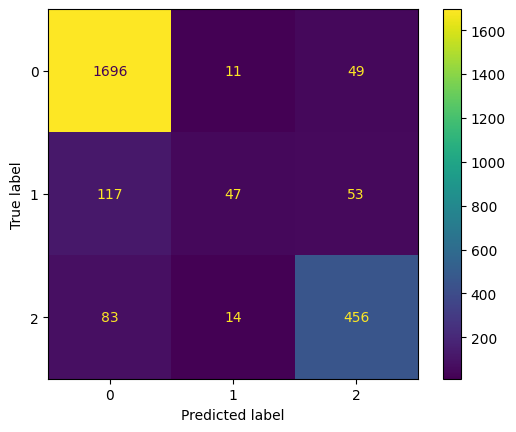

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(yTest, lrPred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, log_loss

print("Accuracy: ", accuracy_score(yTest, lrPred))
print("F1: ", f1_score(yTest, lrPred, average='weighted'))
print("Loss: ", log_loss(yTest, lrProb))

Accuracy:  0.8705463182897862
F1:  0.8533304355916832
Loss:  0.34514944031229083


In [ ]:
print(dataset["Type"].unique())

['h' 'u' 't']


**h=0, u=1, t=2**

**Prediction for unseen data**

In [ ]:
for i, prediction in enumerate(lrProb):
    print("Row=%d, Predicted=%s" % (i, prediction))

Row=0, Predicted=[0.28456679 0.54690988 0.16852333]
Row=1, Predicted=[9.99030160e-01 9.53761020e-04 1.60788813e-05]
Row=2, Predicted=[0.95018243 0.00573923 0.04407833]
Row=3, Predicted=[0.14408373 0.19996694 0.65594934]
Row=4, Predicted=[0.023483   0.0752296  0.90128739]
Row=5, Predicted=[0.97959022 0.01199497 0.00841481]
Row=6, Predicted=[0.81416249 0.17504883 0.01078868]
Row=7, Predicted=[0.97414377 0.01963302 0.00622321]
Row=8, Predicted=[0.9892062  0.00498629 0.00580751]
Row=9, Predicted=[0.19573655 0.37799092 0.42627253]
Row=10, Predicted=[0.05621073 0.06535282 0.87843645]
Row=11, Predicted=[0.39813171 0.19399065 0.40787765]
Row=12, Predicted=[0.89023205 0.04637028 0.06339767]
Row=13, Predicted=[0.92852592 0.04759707 0.02387702]
Row=14, Predicted=[9.94978223e-01 4.95133168e-03 7.04454989e-05]
Row=15, Predicted=[0.98720146 0.00808589 0.00471265]
Row=16, Predicted=[0.98766462 0.00874331 0.00359206]
Row=17, Predicted=[0.65168283 0.06742749 0.28088968]
Row=18, Predicted=[9.91604275e-0

In [ ]:
ynew2 = lr.predict(xTest)
# Print predictions
for i, prediction in enumerate(ynew2):
    print("Row=%d, Predicted=%s" % (i, prediction))

Row=0, Predicted=1
Row=1, Predicted=0
Row=2, Predicted=0
Row=3, Predicted=2
Row=4, Predicted=2
Row=5, Predicted=0
Row=6, Predicted=0
Row=7, Predicted=0
Row=8, Predicted=0
Row=9, Predicted=2
Row=10, Predicted=2
Row=11, Predicted=2
Row=12, Predicted=0
Row=13, Predicted=0
Row=14, Predicted=0
Row=15, Predicted=0
Row=16, Predicted=0
Row=17, Predicted=0
Row=18, Predicted=0
Row=19, Predicted=1
Row=20, Predicted=2
Row=21, Predicted=0
Row=22, Predicted=0
Row=23, Predicted=0
Row=24, Predicted=0
Row=25, Predicted=1
Row=26, Predicted=0
Row=27, Predicted=0
Row=28, Predicted=0
Row=29, Predicted=2
Row=30, Predicted=2
Row=31, Predicted=0
Row=32, Predicted=0
Row=33, Predicted=0
Row=34, Predicted=0
Row=35, Predicted=0
Row=36, Predicted=0
Row=37, Predicted=0
Row=38, Predicted=0
Row=39, Predicted=0
Row=40, Predicted=0
Row=41, Predicted=0
Row=42, Predicted=0
Row=43, Predicted=2
Row=44, Predicted=0
Row=45, Predicted=2
Row=46, Predicted=2
Row=47, Predicted=2
Row=48, Predicted=2
Row=49, Predicted=2
Row=50, Pr

**5.2 K-Nearest Neighbors (KNN)**

The kNN algorithm can be considered a voting system, where the majority class label determines the class label of a new data point among its nearest ‘k’ (where k is an integer) neighbors in the feature space. Imagine a small village with a few hundred residents, and you must decide which political party you should vote for. To do this, you might go to your nearest neighbors and ask which political party they support. If the majority of your’ k’ nearest neighbors support party A, then you would most likely also vote for party A. This is similar to how the kNN algorithm works, where the majority class label determines the class label of a new data point among its k nearest neighbors.

more: https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() #default n_neighbors = 5
knn.fit(xTrain, yTrain)
knnPred = knn.predict(xTest)
knnProb = knn.predict_proba(xTest)
print(classification_report(yTest, knnPred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1756
           1       0.50      0.24      0.33       217
           2       0.79      0.58      0.67       553

    accuracy                           0.81      2526
   macro avg       0.71      0.59      0.63      2526
weighted avg       0.79      0.81      0.79      2526



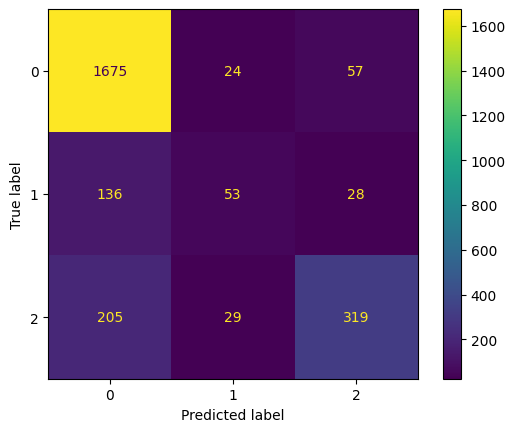

In [ ]:
cm = confusion_matrix(yTest, knnPred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, log_loss

print("Accuracy: ", accuracy_score(yTest, knnPred))
print("F1: ", f1_score(yTest, knnPred, average='weighted'))
print("Loss: ", log_loss(yTest, knnProb))

Accuracy:  0.8103721298495645
F1:  0.7915377266196563
Loss:  2.044588712419006


**Visualize Classfication**

In [ ]:
## THIS CODE FOR VISUALIZATION IS BROKEN, FIX IT!

In [ ]:
!pip install mlxtend==0.13.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.7 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


TypeError: ignored

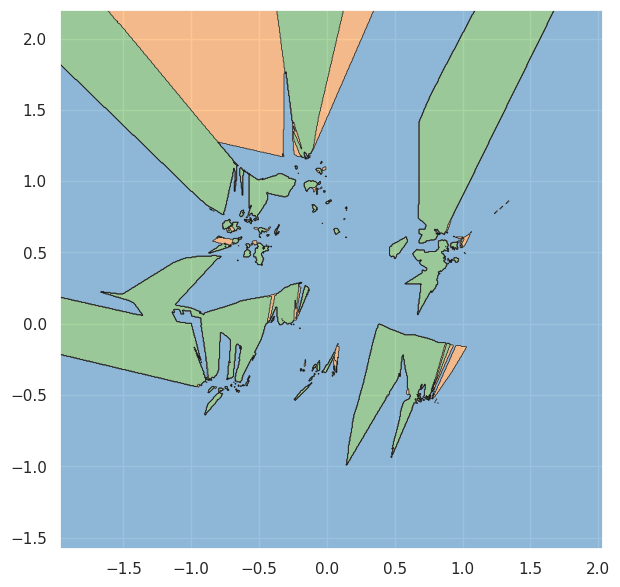

In [ ]:
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

# Apply PCA and reduce the dimensionality of your training set
pca = PCA(n_components=2)
x_pca = pca.fit_transform(xTrain)
# xTest_pca = pca.transform(xTest)

knn5 = KNeighborsClassifier() #default n_neighbors = 5
knn5.fit(x_pca, yTrain)

# xCombined_pca = np.vstack((xTrain_pca, xTest_pca))
# yCombined = np.hstack((yTrain, yTest))

# You can now use the transformed data with plot_decision_regions
fig, ax = plt.subplots(figsize=(7,7))
plot_decision_regions(x_pca, yTrain, clf=knn5)
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.legend(loc='upper left')
plt.show()


**5.3 Gaussian Naive Bayes**

Representation for Gaussian Naive Bayes

We calculated the probabilities for input values for each class using a frequency. With real-valued inputs, we can calculate the mean and standard deviation of input values (x) for each class to summarize the distribution.

This means that in addition to the probabilities for each class, we must also store the mean and standard deviations for each input variable for each class.

more: https://machinelearningmastery.com/naive-bayes-for-machine-learning/

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(xTrain, yTrain)
gnbPred = gnb.predict(xTest)
gnbProb = gnb.predict_proba(xTest)
print(classification_report(yTest, gnbPred))

              precision    recall  f1-score   support

           0       0.94      0.13      0.23      1756
           1       0.10      0.91      0.18       217
           2       0.27      0.14      0.18       553

    accuracy                           0.20      2526
   macro avg       0.44      0.39      0.20      2526
weighted avg       0.72      0.20      0.22      2526



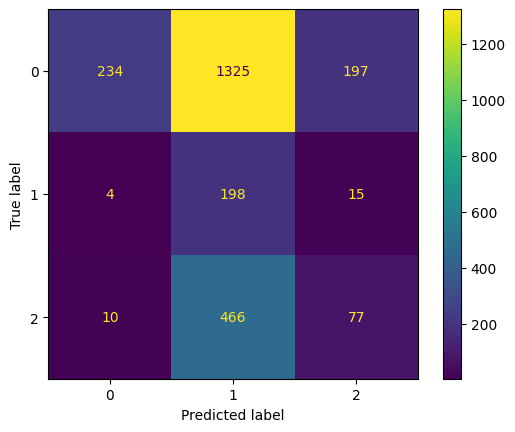

In [ ]:
cm = confusion_matrix(yTest, gnbPred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, log_loss

print("Accuracy: ", accuracy_score(yTest, gnbPred))
print("F1: ", f1_score(yTest, gnbPred, average='weighted'))
print("Loss: ", log_loss(yTest, gnbProb))

Accuracy:  0.20150435471100553
F1:  0.21780685376724385
Loss:  28.78070027151595


**5.4 Hyperparameter Optimization**

fine tuning hyperpamater to get better result from model

In [ ]:
from sklearn.model_selection import GridSearchCV
hyper_params = {
'n_neighbors': range(1,16)
}
# Too many hyperparameters
# Range is too big
grid = GridSearchCV(KNeighborsClassifier(), hyper_params)
grid.fit(xTrain, yTrain)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 16)})

In [ ]:
grid.best_params_

{'n_neighbors': 11}

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = grid.best_params_['n_neighbors'])
knn_model.fit(xTrain, yTrain)
knn2Pred = knn_model.predict(xTest)
knn2Prob = knn_model.predict_proba(xTest)
print(classification_report(yTest, knn2Pred))


              precision    recall  f1-score   support

           0       0.82      0.96      0.89      1756
           1       0.52      0.14      0.22       217
           2       0.80      0.59      0.68       553

    accuracy                           0.81      2526
   macro avg       0.71      0.56      0.60      2526
weighted avg       0.79      0.81      0.78      2526



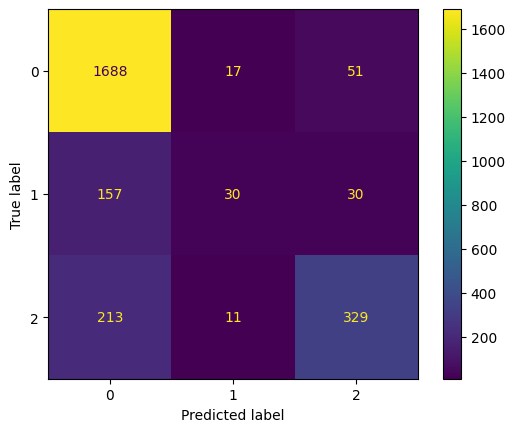

In [ ]:
cm = confusion_matrix(yTest, knn2Pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
print("Accuracy: ", accuracy_score(yTest, knn2Pred))
print("F1: ", f1_score(yTest, knn2Pred, average='weighted'))
print("Loss: ", log_loss(yTest, knn2Prob))


Accuracy:  0.8103721298495645
F1:  0.7836662411019027
Loss:  0.958690427490728


**5.5 Cross Validation**



What is cross-validation?
Cross-validation (CV) is a technique used to assess a machine learning model and test its performance (or accuracy). It involves reserving a specific sample of a dataset on which the model isn't trained. Later on, the model is tested on this sample to evaluate it.

more: https://learn.g2.com/cross-validation

https://neptune.ai/blog/cross-validation-in-machine-learning-how-to-do-it-right

In [ ]:
#using K-fold default 10
from sklearn.model_selection import cross_val_score
cross = cross_val_score(lr, x, y, cv=KFold(n_splits=10), scoring='accuracy')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

New Accuracy for LR model after fine tuning using Cross Validation

In [ ]:
print("Logistic Regression Accuracy: ", cross)
print("LR Accuracy", cross.mean())

Logistic Regression Accuracy:  [0.8432304  0.85352336 0.86302454 0.85510689 0.90182106 0.82581156
 0.85510689 0.85736926 0.87163233 0.93106181]
LR Accuracy 0.865768809453004


k-Fold cross-validation is a technique that minimizes the disadvantages of the hold-out method. k-Fold introduces a new way of splitting the dataset which helps to overcome the “test only once bottleneck”.

**Classification for Face Recognition**

In [ ]:
## CHANGE THE DATASET

In [ ]:
from sklearn.datasets import fetch_lfw_people
foto = fetch_lfw_people(min_faces_per_person=60)
print(foto.target_names)
print(foto.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


cek foto

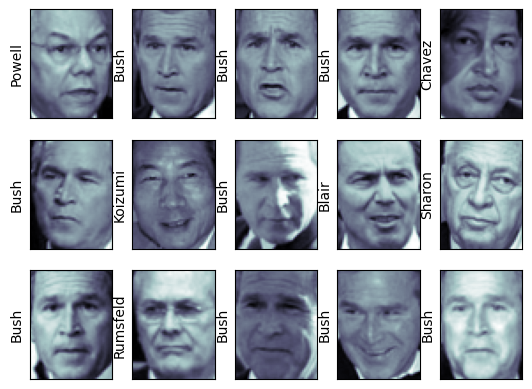

In [ ]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
  axi.imshow(foto.images[i], cmap='bone')
  axi.set(xticks=[], yticks=[],
ylabel=foto.target_names[foto.target[i]].split()[-1])

In [ ]:
from sklearn.model_selection import train_test_split
Xlatih, Xuji, ylatih, yuji = train_test_split(foto.data, foto.target,random_state=42)

Tuning Hyperparameter in LR using Grid Search for regularization and Cross Validation

In [ ]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(Xlatih,ylatih)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.835857115123277


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model = logreg_cv.best_estimator_
yprediksi = model.predict(Xuji)

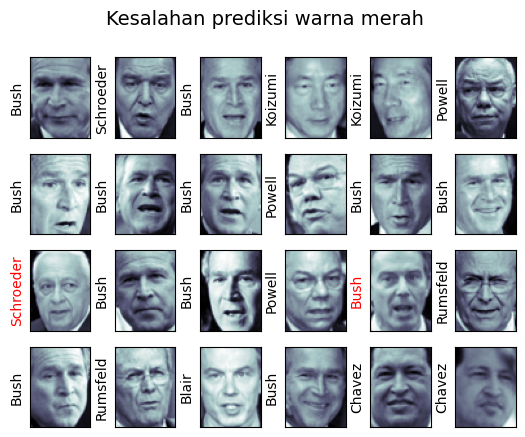

In [ ]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
  axi.imshow(Xuji[i].reshape(62, 47), cmap='bone')
  axi.set(xticks=[], yticks=[])
  axi.set_ylabel(foto.target_names[yprediksi[i]].split()[-1],
color='black' if yprediksi[i] == yuji[i] else 'red')
fig.suptitle('Kesalahan prediksi warna merah', size=14);

confusion matrix

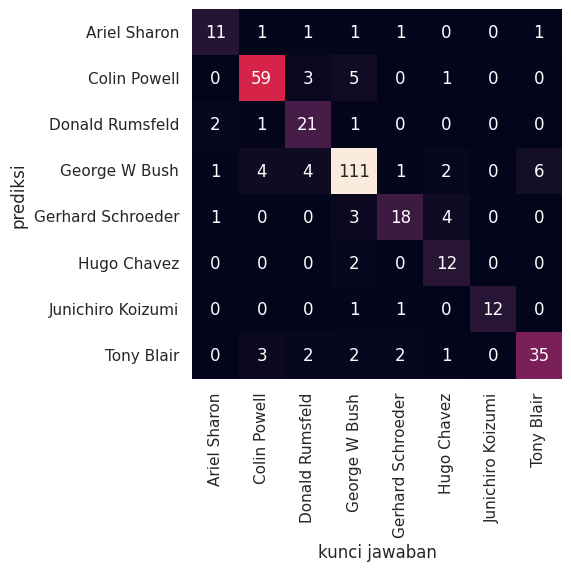

In [ ]:
import seaborn as sns
sns.set()

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(yuji, yprediksi)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=foto.target_names, yticklabels=foto.target_names)
plt.xlabel('kunci jawaban')
plt.ylabel('prediksi');

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(yuji, yprediksi)
print('nilai akurasi ',acc)

nilai akurasi  0.827893175074184
